## Linear Regression

In [9]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import json
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import tensorflow as tf

In [3]:
DATA_IN_PATH = './datasets/word2vec-nlp-tutorial/data_in/'
DATA_OUT_PATH = './datasets/word2vec-nlp-tutorial/data_out/'

In [2]:
def summary_token(x):
    print('문장의 최대 길이:{}'.format(np.max(x)))
    print('문장의 최소 길이:{}'.format(np.min(x)))
    print('문장의 평균 길이:{}'.format(np.mean(x)))
    print('문장의 중앙 값:{}'.format(np.median(x)))
    print('문장의 1사분위 길이:{}'.format(np.percentile(x, 25)))
    print('문장의 3사분위 길이:{}'.format(np.percentile(x, 75)))

In [4]:
def preprocessing(review, mystopwords, remove_stopwords=False):
    review_text = BeautifulSoup(review, 'html').get_text()
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    words = review_text.lower().split()
    
    if remove_stopwords:
        stops =set(stopwords.words('english') + mystopwords)
        words = [w for w in words if w not in stops]
    
    clean_review = ' '.join(words)
    
    return clean_review

In [5]:
train_df = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv',
                      header=0,
                      delimiter='\t',
                      quoting=3) # quoting=3 --> quotation mark를 문자로 취급하여 읽어 들임 (일반 적으로 사용)
print(train_df.head())
print(train_df.shape)

         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...
(25000, 3)


In [8]:
clean_train_reviews = []
for review in train_df['review']:
    clean_train_reviews.append(preprocessing(review, [], remove_stopwords=True))

C:\Users\frank\AppData\Local\Temp\ipykernel_4660\1138981177.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, 'html').get_text()


In [ ]:
# df = pd.read_csv(DATA_IN_PATH + '')

In [11]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

print(tokenizer.word_index)

{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'things': 79, 'p

In [12]:
text_sequences[0]

[404,
 70,
 419,
 8815,
 506,
 2456,
 115,
 54,
 873,
 516,
 178,
 18686,
 178,
 11242,
 165,
 78,
 14,
 662,
 2457,
 117,
 92,
 10,
 499,
 4074,
 165,
 22,
 210,
 581,
 2333,
 1194,
 11242,
 71,
 4826,
 71,
 635,
 2,
 253,
 70,
 11,
 302,
 1663,
 486,
 1144,
 3265,
 8815,
 411,
 793,
 3342,
 17,
 441,
 600,
 1500,
 15,
 4424,
 1851,
 998,
 146,
 342,
 1442,
 743,
 2424,
 4,
 8815,
 418,
 70,
 637,
 69,
 237,
 94,
 541,
 8815,
 26055,
 26056,
 120,
 1,
 8815,
 323,
 8,
 47,
 20,
 323,
 167,
 10,
 207,
 633,
 635,
 2,
 116,
 291,
 382,
 121,
 15535,
 3315,
 1501,
 574,
 734,
 10013,
 923,
 11578,
 822,
 1239,
 1408,
 360,
 8815,
 221,
 15,
 576,
 8815,
 22224,
 2274,
 13426,
 734,
 10013,
 27,
 28606,
 340,
 16,
 41,
 18687,
 1500,
 388,
 11243,
 165,
 3962,
 8815,
 115,
 627,
 499,
 79,
 4,
 8815,
 1430,
 380,
 2163,
 114,
 1919,
 2503,
 574,
 17,
 60,
 100,
 4875,
 5100,
 260,
 1268,
 26057,
 15,
 574,
 493,
 744,
 637,
 631,
 3,
 394,
 164,
 446,
 114,
 615,
 3266,
 1160,
 684,
 48,


In [13]:
word_vocab = tokenizer.word_index
word_vocab ['<PAD>'] = 0

In [17]:
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    text_sequences, maxlen=174, padding='pre', truncating='pre')
print(train_inputs[1])
print(train_inputs.shape)

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0   232   203  3048  3565  7116   317
     2   405   153    19   634 10967 11898  8816  1653  1035  3494   232
   154   314  7116  2701   178     2  2349    87  1111   582   217  2219
   149    73   160   626  1035  2882   194   642  3316  3464  3869   154
   405   180   155   158    79     1 19718  2177  1251    68  6828   170
   281   811     1   532 10968     4  2003    16    36   881  1251   376
   634   314  7116   159  2564  1653  1035  3494   

In [38]:
## word2vec
train_data = pd.read_csv(DATA_IN_PATH + 'train_clean.csv',
                      header=0,
                      delimiter=',',
                      quoting=3) # quoting=3 --> quotation mark를 문자로 취급하여 읽어 들임 (일반 적으로 사용)

display(train_data)
print(train_data.shape)

review  sentiment
0      stuff going moment mj started listening music ...          1
1      classic war worlds timothy hines entertaining ...          1
2      film starts manager nicholas bell giving welco...          0
3      must assumed praised film greatest filmed oper...          0
4      superbly trashy wondrously unpretentious explo...          1
...                                                  ...        ...
24995  seems like consideration gone imdb reviews fil...          0
24996  believe made film completely unnecessary first...          0
24997  guy loser get girls needs build picked stronge...          0
24998  minute documentary bu uel made early one spain...          0
24999  saw movie child broke heart story unfinished e...          1

[25000 rows x 2 columns]

(25000, 2)


In [77]:
reviews = train_data['review']
sentiments = train_data['sentiment']

In [78]:
sentences = [r.split() for r in reviews]

In [25]:
! pip install gensim

In [40]:
from gensim.models import word2vec

In [79]:
model = word2vec.Word2Vec(sentences,
                         vector_size=300,
                         min_count=40,
                         window=10,
                         sample=0.001,
                         negative=5)
model.save('./datasets/word2vec-nlp-tutorial/300feature_40min_10context')

In [80]:
print(model.wv.index_to_key)
print(len(model.wv.index_to_key))
index2word_set = set(model.wv.index_to_key)
print(len(model.wv[0]))
print(len(model.wv.index_to_key[0]))

['movie', 'film', 'one', 'like', 'good', 'time', 'even', 'would', 'story', 'really', 'see', 'well', 'much', 'get', 'bad', 'people', 'also', 'first', 'great', 'made', 'way', 'make', 'could', 'movies', 'think', 'characters', 'character', 'watch', 'two', 'films', 'seen', 'many', 'life', 'plot', 'acting', 'never', 'love', 'little', 'best', 'show', 'know', 'ever', 'man', 'better', 'end', 'still', 'say', 'scene', 'scenes', 'go', 'something', 'back', 'real', 'watching', 'though', 'thing', 'old', 'years', 'actors', 'director', 'work', 'another', 'new', 'nothing', 'funny', 'actually', 'makes', 'look', 'find', 'going', 'part', 'lot', 'every', 'world', 'cast', 'us', 'quite', 'want', 'things', 'pretty', 'young', 'seems', 'around', 'horror', 'got', 'however', 'fact', 'take', 'big', 'enough', 'long', 'thought', 'series', 'may', 'original', 'give', 'action', 'right', 'without', 'must', 'comedy', 'always', 'times', 'point', 'gets', 'family', 'come', 'role', 'saw', 'almost', 'interesting', 'least', 'do

In [81]:
# 문장 벡터의 평균값 계산 --> 문장의 의미
def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features), np.float32)
    num_words = 0
    index2word_set = set(model.wv.index_to_key)
    
    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector=np.add(feature_vector, model.wv[w])
            
    feature_vector = feature_vector/num_words
    
    return feature_vector

def get_dataset(reviews, model, num_features):
    dataset = []
    
    for s in reviews:
        dataset.append(get_features(s, model, num_features))
        
    reviewFeaturesVec = np.array(dataset)
    return reviewFeaturesVec

In [82]:
train_data_vec = get_dataset(sentences, model, 300)

In [83]:
print(train_data_vec.shape)
train_data_vec[0]

(25000, 300)


array([ 0.1978156 , -0.00356211, -0.160765  , -0.10528105, -0.13416892,
        0.06067421,  0.11890967,  0.22861192, -0.04894045,  0.0881623 ,
        0.3093028 ,  0.06449675, -0.24572684, -0.24122395,  0.11806905,
       -0.23903519,  0.3892072 , -0.09049843,  0.02289053,  0.28523195,
        0.07324948,  0.1946781 ,  0.22069877,  0.15041989,  0.16612568,
       -0.23596138, -0.19374494, -0.09232171, -0.1749507 , -0.08888933,
       -0.05772368, -0.12838532, -0.01812795,  0.0468336 ,  0.1210942 ,
        0.06457923, -0.03957678, -0.12205778, -0.07371394, -0.00723182,
        0.03376367, -0.00073783,  0.03015273,  0.07462679, -0.13148428,
        0.02955783,  0.04681617,  0.03163011, -0.14413731,  0.0828936 ,
        0.15267266,  0.01350435,  0.12765718,  0.167288  , -0.03304699,
       -0.11575921,  0.27321634, -0.16520847, -0.11852882, -0.11053181,
       -0.3192523 , -0.00046196,  0.08982664, -0.16727707, -0.17286295,
        0.230061  , -0.14439085,  0.15566646, -0.28198305, -0.08

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = train_data_vec
y = np.array(sentiments)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lgs = LogisticRegression(max_iter=1000)
lgs.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [88]:
lgs.score(X_test, y_test)

0.8666

In [89]:
test_clean_datas = pd.read_csv(DATA_IN_PATH + 'test_clean.csv')
test_review = test_clean_datas['reviews']

test_sentences = [r.split() for r in test_review]

test_sentences

[['stuff',
  'going',
  'moment',
  'mj',
  'started',
  'listening',
  'music',
  'watching',
  'odd',
  'documentary',
  'watched',
  'wiz',
  'watched',
  'moonwalker',
  'maybe',
  'want',
  'get',
  'certain',
  'insight',
  'guy',
  'thought',
  'really',
  'cool',
  'eighties',
  'maybe',
  'make',
  'mind',
  'whether',
  'guilty',
  'innocent',
  'moonwalker',
  'part',
  'biography',
  'part',
  'feature',
  'film',
  'remember',
  'going',
  'see',
  'cinema',
  'originally',
  'released',
  'subtle',
  'messages',
  'mj',
  'feeling',
  'towards',
  'press',
  'also',
  'obvious',
  'message',
  'drugs',
  'bad',
  'kay',
  'visually',
  'impressive',
  'course',
  'michael',
  'jackson',
  'unless',
  'remotely',
  'like',
  'mj',
  'anyway',
  'going',
  'hate',
  'find',
  'boring',
  'may',
  'call',
  'mj',
  'egotist',
  'consenting',
  'making',
  'movie',
  'mj',
  'fans',
  'would',
  'say',
  'made',
  'fans',
  'true',
  'really',
  'nice',
  'actual',
  'feature

In [93]:
test_data_vecs = get_dataset(test_sentences, model, 300)

In [94]:
test_predicted = lgs.predict(test_data_vecs)
test_predicted

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [96]:
answer_dataset = pd.DataFrame({'id': test_clean_datas['id'],
                              'sentiment': test_predicted})

answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_w2v_answer.csv')

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
rf.score(X_test, y_test)

0.8442

In [104]:
test_predicted = rf.predict(test_data_vecs)
test_predicted

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [105]:
answer_dataset = pd.DataFrame({'id': test_clean_datas['id'],
                              'sentiment': test_predicted})

answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_w2v_answer_rf.csv')

## RNN(LSTM)

In [106]:
traing_data = np.load(DATA_IN_PATH + 'train_input.npy')
traing_label = np.load(DATA_IN_PATH + 'train_label.npy')

with open(DATA_IN_PATH + 'data_configs.json') as f:
    prepro_configs = json.load(f)

In [109]:
traing_data.shape
prepro_configs.keys()

dict_keys(['vocab', 'vocab_size'])

In [115]:
## hyper parameter

model_name = 'rnn_clasifier_en'
batch_size = 128
num_epochs = 5
valid_split = 0.1
max_len = traing_data.shape[1] # 174

kargs = {'model_name' : model_name,
        'vocab_size' : prepro_configs['vocab_size'],
        'embedding_dimension' : 100,
        'dropout_rate' : 0.2,
        'lstm_dimension' : 150,
        'dense_dimension' : 150,
        'output_dimension' : 1}

In [116]:
class RNNClasifier(tf.keras.Model):
    def __init__(self, **kargs):
        super(RNNClasifier, self).__init__(name=kargs['model_name'])
        self.embedding = tf.keras.layers.Embedding(kargs['vocab_size'], kargs['embedding_dimension'])
        self.lstm1 = tf.keras.layers.LSTM(kargs['lstm_dimension'], activation='tanh',
                                         return_sequences=True,
                                         return_state=False)
        self.lstm2 = tf.keras.layers.LSTM(kargs['lstm_dimension'], activation='tanh',
                                         return_sequences=False,
                                         return_state=False)
        self.dropout = tf.keras.layers.Dropout(kargs['dropout_rate'])
        self.dense1 = tf.keras.layers.Dense(kargs['dense_dimension'], activation='relu')
        self.dense2 = tf.keras.layers.Dense(kargs['output_dimension'], activation='sigmoid')
        
    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.lstm1(x)
        x = self.lstm2(x)
        x = self.dropout(x)
        x = self.dense1(x)
        x = self.dense2(x)
        
        return x
    
model = RNNClasifier(**kargs)

In [117]:
model.build(input_shape = (25000, 174, ))
model.summary()

Model: "rnn_clasifier_en"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  7406600   
                                                                 
 lstm (LSTM)                 multiple                  150600    
                                                                 
 lstm_1 (LSTM)               multiple                  180600    
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  22650     
                                                                 
 dense_1 (Dense)             multiple                  151       
                                                                 
Total params: 7,760,601
Trainable params: 7,760,60

In [119]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./datasets/word2vec-nlp-tutorial/bast_rnn.h5',
                                               save_best_only=True,
                                               save_weights_only=True)
earlystop = tf.keras.callbacks.EarlyStopping(patience=3)

In [121]:
history = model.fit(traing_data, traing_label, batch_size=batch_size, epochs=num_epochs,
                   validation_split=valid_split, callbacks=[checkpoint, earlystop])

Epoch 1/5
176/176 [==============================] - 303s 2s/step - loss: 0.3946 - acc: 0.8166 - val_loss: 0.2838 - val_acc: 0.8816
Epoch 2/5
176/176 [==============================] - 367s 2s/step - loss: 0.1482 - acc: 0.9483 - val_loss: 0.3328 - val_acc: 0.8788
Epoch 3/5
176/176 [==============================] - 299s 2s/step - loss: 0.0628 - acc: 0.9794 - val_loss: 0.4847 - val_acc: 0.8584
Epoch 4/5
176/176 [==============================] - 313s 2s/step - loss: 0.0391 - acc: 0.9870 - val_loss: 0.5227 - val_acc: 0.8564


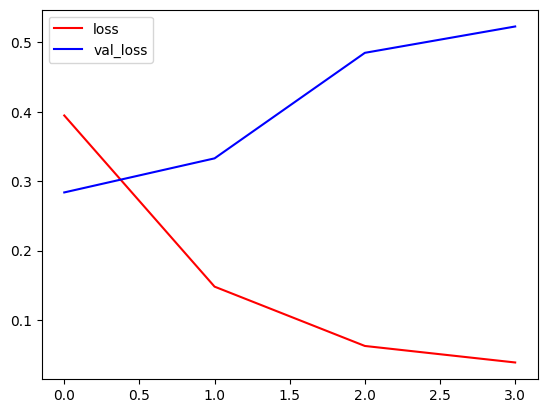

In [122]:
plt.plot(history.history['loss'], 'r', label='loss')
plt.plot(history.history['val_loss'], 'b', label='val_loss')
plt.legend()
plt.show()

In [125]:
model.load_weights('./datasets/word2vec-nlp-tutorial/bast_rnn.h5')
test_data = np.load(DATA_IN_PATH + 'test_input.npy')
test_label = np.load(DATA_IN_PATH + 'test_label.npy', allow_pickle=True)
print(test_data.shape)
test_label

(25000, 174)


array(['12311_10', '8348_2', '5828_4', ..., '2531_1', '7772_8',
       '11465_10'], dtype=object)

In [126]:
predictions = model.predict(test_data, batch_size=batch_size)
predictions.shape

196/196 [==============================] - 100s 504ms/step


(25000, 1)

In [136]:
(predictions.squeeze(-1)).shape

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [137]:
predictions = predictions.squeeze(-1)
output_rnn = pd.DataFrame(
                        {'id' : test_label,
                          'setiment' : predictions}
                         )
output_rnn.to_scv(DATA_OUT_PATH + 'lgs_w2v_answer_rnn.csv', index=False)

ValueError: cannot select an axis to squeeze out which has size not equal to one

## 한글(네이버 리뷰)

In [161]:
from konlpy.tag import Okt
import seaborn as sns

In [164]:
train_df = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt',
                      header=0,
                      delimiter='\t',
                      quoting=3)

test_df = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt',
                      header=0,
                      delimiter='\t',
                      quoting=3)

In [165]:
def summary_token(x):
    print('문장의 최대 길이:{}'.format(np.max(x)))
    print('문장의 최소 길이:{}'.format(np.min(x)))
    print('문장의 평균 길이:{}'.format(np.mean(x)))
    print('문장의 중앙 값:{}'.format(np.median(x)))
    print('문장의 1사분위 길이:{}'.format(np.percentile(x, 25)))
    print('문장의 3사분위 길이:{}'.format(np.percentile(x, 75)))

In [174]:
train_df.head()

id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1

In [175]:
len(train_df)

150000

In [176]:
train_length = train_df['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

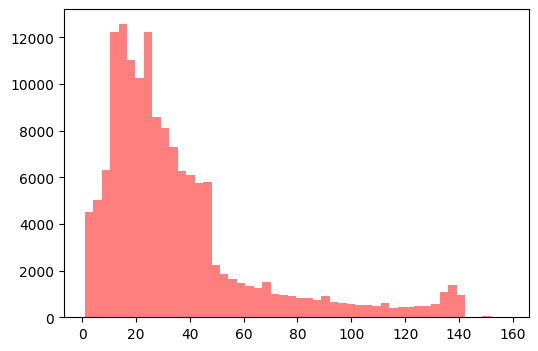

In [177]:
plt.figure(figsize=(6,4))
plt.hist(train_length, bins=50, color='r', alpha=0.5, label='length')
plt.show()

In [178]:
summary_token(train_length)

문장의 최대 길이:158
문장의 최소 길이:1
문장의 평균 길이:35.23749333333333
문장의 중앙 값:27.0
문장의 1사분위 길이:16.0
문장의 3사분위 길이:42.0


In [179]:
train_review = [r for r in train_df['document'] if type(r) is str]
train_review

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

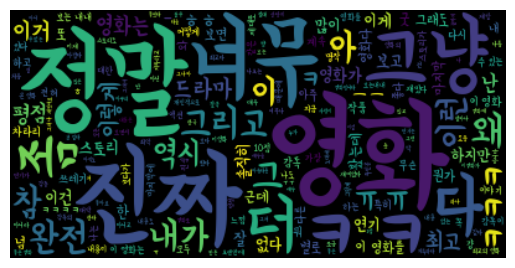

In [180]:
wordcloud = WordCloud(font_path=DATA_IN_PATH + 'BMYEONSUNG_ttf.ttf').generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: ylabel='count'>

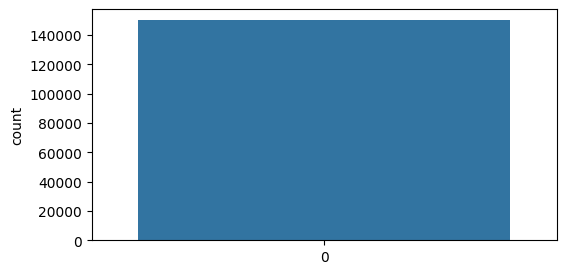

In [181]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['label'])

In [182]:
print('긍정 리뷰 : ', train_df['label'].value_counts()[1])
print('부정 리뷰 : ', train_df['label'].value_counts()[0])

긍정 리뷰 :  74827
부정 리뷰 :  75173


In [148]:
okt = Okt()

In [201]:
def preprocessing(review, mystopwords, remove_stopwords=False):
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", str(review))
    words = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        words = [w for w in words if w not in mystopwords]
    
#     clean_review = ' '.join(words)
    
    return words

In [197]:
print(re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", train_df['document'][0]))

아 더빙 진짜 짜증나네요 목소리


In [202]:
stopwords = ['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한', '영화']
clean_train_reviews = []
for review in train_df['document']:
    if type(review) == str:
        clean_train_reviews.append(preprocessing(review, stopwords, True))
    else:
        clean_train_reviews.append([])
clean_train_reviews

KeyboardInterrupt: 

In [ ]:
clean_test_reviews = []
for review in test_df['document']:
    if type(review) == str:
        clean_test_reviews.append(preprocessing(review, stopwords, True))
    else:
        clean_train_reviews.append([])

In [ ]:
tokenizer = tf.kerasras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
train_sequences = tokenizer.texts_to_sequences(clean_train_reviews)
test_sequences = tokenizer.texts_to_sequences(clean_test_reviews)

word_vocab = tokenizer.word_index
MAX_SEQUENCE_LENGTH = 8

trian_inputs = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', truncating='pre')
train_labels = train_df['label']

test_inputs = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', truncating='pre')
test_labels = test_df['label']

In [ ]:
## hyper parameter

model_name = 'cnn_clasifier_kr'
batch_size = 512
num_epochs = 2
valid_split = 0.1
max_len = traing_data.shape[1] # 174

kargs = {'model_name' : model_name,
        'vocab_size' : word_vocab,
        'embedding_dimension' : 128,
        'num_filters' : 100,
        'dropout_rate' : 0.5,
        'hidden_dimension' : 250,
        'output_dimension' : 1}

In [ ]:
class CNNClassifier(tf.keras.Model):
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embadding = tf.keras.layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embedding_dimension'])
        self.conv_list = [
            tf.keras.layers.Conv1D(
                filters=kargs['num_filters'],
                kernel_size=kernel_size,
                padding='valid',
                activation='relu',
                kernel_constraint=tf.keras.constraints.MaxNorm(max_vale=3.)
            ) for kernel_size in [3, 4, 5]
        ]
        
        self.pooling = tf.keras.layers.GlobalMaxPooling1D()
        self.dropout = tf.keras.layers.Dropout(kargs['dropout_rate'])
        self.fc1 = tf.keras.layers.Dense(units=kargs['hidden_dimension'],
                                         activation='relu',
                                         kernel_constraint=tf.keras.constraints.MaxNorm(max_vale=3.))
        
        self.fc2 = tf.keras.layers.Dense(units=kargs['output_dimension'],
                                         activation='sigmoid',
                                         kernel_constraint=tf.keras.constraints.MaxNorm(max_vale=3.))
        
    def call(self, inputs):
        x = self.embadding(inputs)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x